In [52]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

## Load and prepare dataset

In [53]:
X, y = load_breast_cancer(return_X_y=True)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=0.20, random_state=42)

In [55]:
target_labels = np.unique(y_train)
print(f"Target labels: {target_labels}")

Target labels: [0 1]


## Create and train ML model 

In [56]:
model = tf.keras.Sequential([tf.keras.layers.Dense(16, activation='relu', 
                                                   input_shape=(X_train.shape[1],)),
                             tf.keras.layers.Dense(8, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')])

In [57]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [58]:
# train the model 
history = model.fit(X_train, 
                    y_train, 
                    epochs=50, 
                    validation_data=(X_val, y_val), 
                    batch_size=32)

Epoch 1/50
12/12 [==============================] - 1s 15ms/step - loss: 145.9251 - accuracy: 0.6346 - val_loss: 139.5890 - val_accuracy: 0.6044
Epoch 2/50
12/12 [==============================] - 0s 4ms/step - loss: 110.0845 - accuracy: 0.6346 - val_loss: 102.4751 - val_accuracy: 0.6044
Epoch 3/50
12/12 [==============================] - 0s 5ms/step - loss: 78.8770 - accuracy: 0.6346 - val_loss: 67.1764 - val_accuracy: 0.6044
Epoch 4/50
12/12 [==============================] - 0s 4ms/step - loss: 52.0362 - accuracy: 0.6346 - val_loss: 42.8817 - val_accuracy: 0.6044
Epoch 5/50
12/12 [==============================] - 0s 5ms/step - loss: 30.6606 - accuracy: 0.6291 - val_loss: 18.3093 - val_accuracy: 0.4505
Epoch 6/50
12/12 [==============================] - 0s 5ms/step - loss: 15.5861 - accuracy: 0.1841 - val_loss: 10.9251 - val_accuracy: 0.1868
Epoch 7/50
12/12 [==============================] - 0s 5ms/step - loss: 12.6708 - accuracy: 0.1758 - val_loss: 9.5047 - val_accuracy: 0.1429
Ep

## Model evaluation 

In [59]:
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, roc_curve, ConfusionMatrixDisplay

In [60]:
y_pred = model.predict(X_test)
y_pred = np.rint(y_pred)

4/4 [==============================] - 0s 2ms/step


In [61]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91        43
           1       0.96      0.93      0.94        71

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



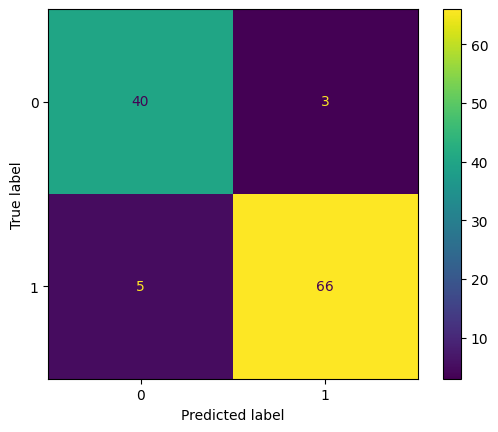

In [62]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_labels)
disp.plot()

## Rule extraction 

In [63]:
import os
import sys
sys.path.insert(0, os.path.abspath('..'))

In [64]:
%load_ext autoreload
%autoreload 2
from dexire.dexire import DEXiRE

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [69]:
dexire = DEXiRE(model=model, class_names=['malignant', 'benign'])

In [70]:
# test extract at last layer level
rules_2 = dexire.extract_rules_at_layer(X_train,
                                        y_train)

12/12 [==============================] - 0s 2ms/step
Unique predictions: [0. 1.]
12/12 [==============================] - 0s 2ms/step
Features: [ 5  7  3 -2 -2 -2 -2],      len: 7,        named_features_len: 8
5
feature_5
Symbolic expression: feature_5 <= 0.5
7
feature_7
Symbolic expression: feature_7 <= 0.5
3
feature_3
Symbolic expression: feature_3 <= 0.5
Symbolic expression: feature_3 > 0.5
Symbolic expression: feature_7 > 0.5
Symbolic expression: feature_5 > 0.5
Features: [ 3 23 -2 -2 -2],      len: 5,        named_features_len: 30
3
X_3
Symbolic expression: X_3 <= 644.5
23
X_23
Symbolic expression: X_23 <= 855.4
Symbolic expression: X_23 > 855.4
Symbolic expression: X_3 > 644.5


In [71]:
rules_2

[IF ((X_3 <= 644.5) AND (X_23 <= 855.4)) THEN malignant, IF ((X_3 > 644.5)) THEN benign, IF ((X_3 <= 644.5) AND (X_23 > 855.4)) THEN benign]

In [72]:
rules = dexire.extract_rules(X_train, y_train)

Unique predictions: [0. 1.]
12/12 [==============================] - 0s 1ms/step
Features: [ 4  5  3 14 -2 -2 -2 -2 12 -2 14 -2  3 -2 -2],      len: 15,        named_features_len: 16
4
feature_4
Symbolic expression: feature_4 <= 0.5
5
feature_5
Symbolic expression: feature_5 <= 0.5
3
feature_3
Symbolic expression: feature_3 <= 0.5
14
feature_14
Symbolic expression: feature_14 <= 0.5
Symbolic expression: feature_14 > 0.5
Symbolic expression: feature_3 > 0.5
Symbolic expression: feature_5 > 0.5
Symbolic expression: feature_4 > 0.5
12
feature_12
Symbolic expression: feature_12 <= 0.5
Symbolic expression: feature_12 > 0.5
14
feature_14
Symbolic expression: feature_14 <= 0.5
Symbolic expression: feature_14 > 0.5
3
feature_3
Symbolic expression: feature_3 <= 0.5
Symbolic expression: feature_3 > 0.5
Features: [ 2  3 -2 -2 23 -2 -2],      len: 7,        named_features_len: 30
2
X_2
Symbolic expression: X_2 <= 96.55
3
X_3
Symbolic expression: X_3 <= 640.95
Symbolic expression: X_3 > 640.95
Symb